# Introduction to pandas

* **pandas** is a Python package providing convenient data structures to work with labelled data.

* **pandas** is perfectly suited for observational / statistical data sets, having many similarities with Excel spreadsheets.

* Key features:

    - easy handling of **missing data**
    - **size mutability**: columns can be inserted and deleted from DataFrame
    - automatic and explicit **data alignment**: objects can be explicitly aligned to a set of labels, or the user can simply ignore the labels and let Series, DataFrame, etc. automatically align the data for you in computations
    - powerful, flexible **group by** functionality to perform split-apply-combine operations on data sets
    - make it **easy to convert** ragged, differently-indexed data in other Python and NumPy data structures into DataFrame objects
    - intelligent label-based **slicing**, **fancy indexing**, and **subsetting** of large data sets
    - intuitive **merging** and **joining** data sets
    - flexible **reshaping** and pivoting of data sets
    - **hierarchical** labeling of axes (possible to have multiple labels per tick)
    - robust IO tools for loading data from **flat files** (CSV and delimited), Excel files, databases, and saving / loading data from the ultrafast HDF5 format
    - **time series**-specific functionality

### Primary data structures of pandas
* **Series** (1-dimensional)
* **DataFrame** (2-dimensional)

pandas is built on top of **NumPy** and is intended to integrate well within a scientific computing environment with many other 3rd party libraries.

## Loading data

First, we import pandas module. We use an alias "pd" to write code quicker.

In [48]:
import pandas as pd

And `numpy` with `matplotlib` just in case too.

In [49]:
import matplotlib.pyplot as plt
import numpy as np

In [50]:
import warnings
warnings.filterwarnings('ignore')

The following cell finds the path to the data on your system so we can read it in

In [51]:
from pathlib import Path # A module for dealing with paths that is operating system agnostic
notebook_dir = Path.cwd() # Get the current working directory
base_dir = notebook_dir.parent.absolute() # Get the parent directory (folder that contains out working directory)
data_dir = base_dir / 'data'# Get diretory where the data is stored
fname = data_dir/'ship_ctd_short.csv'

Let's read the data using `pandas.read_csv()` function.

In [52]:
ctd_data = pd.read_csv(fname)

## Data structures: `DataFrame` and `Series`

Let's interrogate the `DataFrame` object!

In [53]:
type(ctd_data)

pandas.core.frame.DataFrame

In [54]:
# Internal nature of the object
print(ctd_data.shape)
print()
print(ctd_data.dtypes)

(1180, 5)

Depth          float64
Temperature    float64
Oxygen         float64
Irradiance     float64
Salinity       float64
dtype: object


In [55]:
# View just the tip of data
ctd_data.head(5)

,Depth,Temperature,Oxygen,Irradiance,Salinity
0,0.5,16.5080,5.83945,60.4,35.7685
1,1.0,16.5315,5.85881,57.0,35.7679
2,1.5,16.5183,5.88355,53.0,35.7681
3,2.0,16.4921,5.87417,51.3,35.7685
4,2.5,16.4626,5.86818,50.3,35.7688


In [56]:
# View the last rows of data
ctd_data.tail(n=2)  # Note the optional argument (available for head() too)

,Depth,Temperature,Oxygen,Irradiance,Salinity
1178,589.5,11.6760,3.99465,1.000000e-12,35.9688
1179,590.0,11.6765,3.99631,1.000000e-12,35.9686


Get descriptors for the **vertical** axis (rows):

In [57]:
ctd_data.index

RangeIndex(start=0, stop=1180, step=1)

Get descriptors for the **horizontal** axis (columns):

In [58]:
ctd_data.columns

Index(['Depth', 'Temperature', 'Oxygen', 'Irradiance', 'Salinity'], dtype='object')

A lot of information at once including memory usage:

In [59]:
ctd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1180 entries, 0 to 1179
Data columns (total 5 columns):
Depth          1180 non-null float64
Temperature    1180 non-null float64
Oxygen         1180 non-null float64
Irradiance     1180 non-null float64
Salinity       1180 non-null float64
dtypes: float64(5)
memory usage: 46.2 KB


### Series, pandas' 1D data containter

A series can be constructed with the `pd.Series` constructor (passing an array of values) or from a `DataFrame`, by extracting one of its columns.

In [60]:
temp = ctd_data['Temperature']

Some of its attributes:

In [61]:
print(type(temp))
print(temp.dtype)
print(temp.shape)
print(temp.nbytes)

<class 'pandas.core.series.Series'>
float64
(1180,)
9440


Show me what you got!

In [62]:
# uncomment to see the values
# temp

### Numpy as pandas's backend

It is always possible to fall back to a good old NumPy array to pass on to scientific libraries that need them: SciPy, scikit-learn, etc

In [63]:
ctd_data['Temperature'].values

array([16.508 , 16.5315, 16.5183, ..., 11.6758, 11.676 , 11.6765])

In [64]:
type(ctd_data['Temperature'].values)

numpy.ndarray

## Cleaning data

<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">The truth about data science: cleaning your data is 90% of the work. Fitting the model is easy. Interpreting the results is the other 90%.</p>&mdash; Jake VanderPlas (@jakevdp) <a href="https://twitter.com/jakevdp/status/742406386525446144">June 13, 2016</a></blockquote>
<script async src="//platform.twitter.com/widgets.js" charset="utf-8"></script>

In [65]:
list(ctd_data)

['Depth', 'Temperature', 'Oxygen', 'Irradiance', 'Salinity']

### Renaming columns

If we know the units of the variables, we can rename the columns to include these units. This is especailly useful if you plan to carry out unit conversions later

In [66]:
ctd_data.columns = ['Depth_m', 'Temperature_C', 'Oxygen_ml/l', 'Irradiance', 'Salinity_psu']
ctd_data.columns

Index(['Depth_m', 'Temperature_C', 'Oxygen_ml/l', 'Irradiance',
       'Salinity_psu'],
      dtype='object')

Note the use of underscores `_` in the renaming. It may not be pretty, but putting spaces in variable names will cause problems later on in your processing

### Deleting columns

Let us concentrate our attention on temperature, salinity and oxygen, dropping irradiance from the data frame

In [67]:
ctd_data = ctd_data.drop('Irradiance', 1)

In [68]:
ctd_data.head()

,Depth_m,Temperature_C,Oxygen_ml/l,Salinity_psu
0,0.5,16.5080,5.83945,35.7685
1,1.0,16.5315,5.85881,35.7679
2,1.5,16.5183,5.88355,35.7681
3,2.0,16.4921,5.87417,35.7685
4,2.5,16.4626,5.86818,35.7688


Really it would make more sense to have Depth as the index, as the other variables are expected to vary with depth. Make it so!

In [70]:
ctd_data.set_index('Depth_m', inplace=True)
ctd_data

,Temperature_C,Oxygen_ml/l,Salinity_psu
Depth_m,,,
0.5,16.5080,5.83945,35.7685
1.0,16.5315,5.85881,35.7679
1.5,16.5183,5.88355,35.7681
2.0,16.4921,5.87417,35.7685
2.5,16.4626,5.86818,35.7688
...,...,...,...
588.0,11.6755,3.99643,35.9688
588.5,11.6757,3.99618,35.9689
589.0,11.6758,3.99506,35.9689


## Basic visualisation

Try calling `plot()` method of the `ctd_data` object:

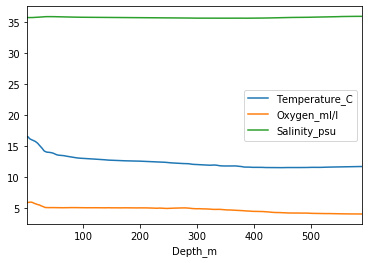

In [71]:
ctd_data.plot()

We can explicitly pass fancy labels to legend if needed

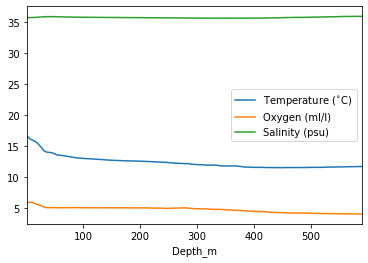

In [72]:
df = pd.DataFrame({'A':26, 'B':20}, index=['N'])
ax = ctd_data.plot()
ax.legend(["Temperature $\mathrm{(^{\circ}C}$)", "Oxygen (ml/l)", "Salinity (psu)"]);

What happens if we pass `subplots=True` as an argument of the `plot()` method?

In [73]:
# ctd_data.plot( ... )

It is easy to create other useful plots using `DataFrame`:

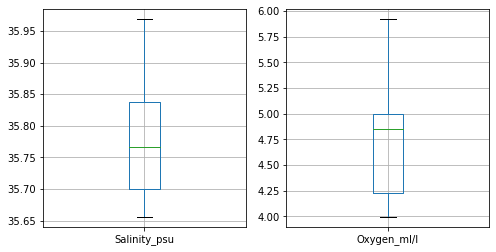

In [75]:
fig, (ax0, ax1) = plt.subplots(ncols=2,figsize=(8,4))
ctd_data.boxplot(ax=ax0, column=['Salinity_psu'])
ctd_data.boxplot(ax=ax1, column=['Oxygen_ml/l']);

Loads more options for visualisation on [the pandas website](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

### Exporting data

One of pandas best features is how it simplifies writing text to a csv (comma seperated value) text file that can be read easily by programs like excel.

In [76]:
# ctd_data.to_csv(data_dir/'ctd_data_out.csv',index=True, header=True)

## Some statistics

In [77]:
ctd_data.describe()

,Temperature_C,Oxygen_ml/l,Salinity_psu
count,1180.000000,1180.000000,1180.000000
mean,12.349396,4.694360,35.778409
std,1.003352,0.437966,0.086346
min,11.479900,3.994650,35.655600
25%,11.589050,4.226740,35.700775
50%,12.017850,4.856475,35.766950
75%,12.691925,4.999835,35.837650
max,16.531500,5.920030,35.968900


Much easier than calling them individually with NumPy!

## Computing correlations

Both `Series` and `DataFrames` have a **`corr()`** method to compute the correlation coefficient.

If series are already grouped into a `DataFrame`, computing all correlation coefficients is trivial:

In [78]:
ctd_data.corr()

,Temperature_C,Oxygen_ml/l,Salinity_psu
Temperature_C,1.000000,0.833816,0.225029
Oxygen_ml/l,0.833816,1.000000,-0.239306
Salinity_psu,0.225029,-0.239306,1.000000


If you want to visualise this correlation matrix, uncomment the following code cell.

In [30]:
#fig, ax = plt.subplots()
#p = ax.imshow(ctd_data.corr(), interpolation="nearest", cmap='RdBu_r', vmin=-1, vmax=1)
#ax.set_xticks(np.arange(len(ctd_data.corr().columns)))
#ax.set_yticks(np.arange(len(ctd_data.corr().index)))
#ax.set_xticklabels(ctd_data.corr().columns)
#ax.set_yticklabels(ctd_data.corr().index)
#fig.colorbar(p)

## Creating DataFrames

* `DataFrame` can also be created manually, by grouping several `Series` together.
* Now just for fun we switch to **another dataset**
    - create 2 `Series` objects from 2 CSV files
    - create a `DataFrame` by combining the two `Series`

* Data are monthly values of
    - Southern Oscillation Index (SOI)
    - Outgoing Longwave Radiation (OLR), which is a proxy for convective precipitation in the western equatorial Pacific
* Data were downloaded from NOAA's website: https://www.ncdc.noaa.gov/teleconnections/

In [31]:
soi_df = pd.read_csv('../data/soi.csv', skiprows=1, parse_dates=[0], index_col=0, na_values=-999.9,
                     date_parser=lambda x: pd.datetime.strptime(x, '%Y%m'))

In [32]:
soi_df.head()

,Value
Date,
1951-01-01,1.5
1951-02-01,0.9
1951-03-01,-0.1
1951-04-01,-0.3
1951-05-01,-0.7


In [33]:
olr_df = pd.read_csv('../data/olr.csv', skiprows=1, parse_dates=[0], index_col=0, na_values=-999.9,
                     date_parser=lambda x: pd.datetime.strptime(x, '%Y%m'))

In [34]:
olr_df.head()

,Value
Date,
1974-06-01,1.1
1974-07-01,0.1
1974-08-01,1.1
1974-09-01,1.1
1974-10-01,1.2


In [35]:
df = pd.DataFrame({'OLR': olr_df.Value,
                   'SOI': soi_df.Value})

Note that, although the dataserires do not overlap completely, we can combine them seamlesssly into a dataframe because pandas understands datetime objects for the index.

In [36]:
df.describe()

,OLR,SOI
count,493.000000,790.000000
mean,0.035294,0.123544
std,0.978162,0.950473
min,-2.600000,-3.600000
25%,-0.600000,-0.500000
50%,0.100000,0.100000
75%,0.700000,0.800000
max,2.400000,2.900000


## Ordinary Least Square (OLS) regressions

### Primitive way: using numpy's polynomial fitting

In [37]:
from numpy.polynomial import polynomial as P

In [38]:
x = df['OLR'].values
y = df['SOI'].values

In [39]:
idx = np.isfinite(x) & np.isfinite(y)

In [40]:
coefs, stats = P.polyfit(x[idx], y[idx], 1, full=True)

In [41]:
y2 = P.polyval(x, coefs)

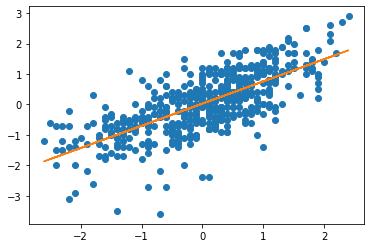

In [42]:
plt.plot(x, y, linestyle='', marker='o')
plt.plot(x, y2)

### Recommended (and more convenient) ways (require additional packages)

##### Statsmodels

In [43]:
# import statsmodels.formula.api as sm

In [44]:
# sm_model = sm.ols(formula="SOI ~ OLR", data=df).fit()

In [45]:
# df['SOI'].plot()
# df['OLR'].plot()
# ax = sm_model.fittedvalues.plot(label="model prediction")
# ax.legend(loc="lower center", ncol=3)

More examples: https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html

## References
* https://github.com/jonathanrocher/pandas_tutorial
* https://github.com/koldunovn/python_for_geosciences
* http://pandas.pydata.org/pandas-docs/stable/index.html#module-pandas
* http://pandas.pydata.org/pandas-docs/stable/10min.html